In [93]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
# Read CSV with robust error handling
df = pd.read_csv('shows.csv', on_bad_lines='skip', engine='python')

In [58]:
df.head(10)

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,"145,597",9.5,TV-G,4h 58m,Documentary,...,"nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,"1,881,190",9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,"210,164",9.4,TV-PG,8h 58m,Documentary,...,"nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode..."
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,"469,081",9.4,TV-MA,9h 54m,"Drama,History,War",...,"nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,"751,884",9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,nm0719307,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...
5,6,tt0306414,The Wire,2002,https://www.imdb.com/title/tt0306414,"340,614",9.3,TV-MA,59m,"Crime,Drama,Thriller",...,"nm0152640,nm0225416,nm0424800,nm0080601,nm0793...","Joe Chappelle,Ernest R. Dickerson,Clark Johnso...","nm0800108,nm0122654,nm0527160,nm0959567,nm1743...","David Simon,Ed Burns,Joy Kecken,Rafael Álvarez...","The Baltimore drug scene, as seen through the ...","ur115536310,ur6387867,ur15794099,ur52675736,ur...","DiCaprioFan13,Supermanfan-13,gogoschka-1,OmarH...","rw8577237,rw8559439,rw2939969,rw3015104,rw8626...","Incredible!,As good as everyone says it is!,Th...",I don't even no where to begin to explain how ...
6,7,tt6769208,Blue Planet II,2017,https://www.imdb.com/title/tt6769208,"41,522",9.3,TV-G,6h 4m,Documentary,...,"nm8780998,nm2518019,nm1435800,nm3806983,nm9968...","Yoland Bosiger,Mark Brownlow,James Honeyborne,...","nm3650640,nm1921870,nm0001877","David Fleming,Jacob Shea,Hans Zimmer",Da

In [59]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [60]:
# Display basic structure
df.describe(include = 'all')

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
count,250.000000,250,250,250.000000,250,250,250.000000,246,249,250,...,250,250,250,250,250,250,250,250,250,250
unique,NaN,250,245,NaN,250,250,NaN,9,77,83,...,249,249,246,246,250,250,250,250,250,250
top,NaN,tt5491994,The Office,NaN,https://www.imdb.com/title/tt5491994,"145,597",NaN,TV-MA,1h,"Animation,Action,Adventure",...,nm0282064,Mandie Fletcher,"nm0193485,nm0255780","Richard Curtis,Ben Elton",David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...
freq,NaN,1,2,NaN,1,1,NaN,110,30,33,...,2,2,3,3,1,1,1,1,1,1
mean,125.500000,NaN,NaN,2006.844000,NaN,NaN,8.765600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,72.312977,NaN,NaN,12.511668,NaN,NaN,0.233398,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1955.000000,NaN,NaN,8.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63.250000,NaN,NaN,2001.000000,NaN,NaN,8.600000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,125.500000,NaN,NaN,2010.000000,NaN,NaN,8.700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,187.750000,NaN,NaN,2016.000000,NaN,NaN,8.900000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# check missing values
df.isnull().sum()

,0
rank,0
show_id,0
title,0
year,0
link,0
imbd_votes,0
imbd_rating,0
certificate,4
duration,1
genre,0


In [62]:
# Fix imbd_votes: remove commas and convert to numeric
df['imbd_votes'] = df['imbd_votes'].astype(str).str.replace(',', '')
df['imbd_votes'] = pd.to_numeric(df['imbd_votes'], errors='coerce')

# Fix duration: convert 'Xh Ym' format into minutes
def convert_duration(duration):
    if pd.isnull(duration):
        return None
    hours = 0
    minutes = 0
    if 'h' in duration:
        parts = duration.split('h')
        hours = int(parts[0].strip())
        if 'm' in parts[1]:
            minutes = int(parts[1].replace('m', '').strip())
    elif 'm' in duration:
        minutes = int(duration.replace('m', '').strip())
    return hours * 60 + minutes

df['duration_minutes'] = df['duration'].apply(convert_duration)

# Split genre into multi-hot encoding
genre_dummies = df['genre'].str.get_dummies(sep=',')
df = pd.concat([df, genre_dummies], axis=1)

# Drop unused columns
df_cleaned = df.drop(columns=['title', 'certificate', 'duration', 'genre'])

# Handle remaining missing values (if any)
df_cleaned = df_cleaned.dropna()

# Correlation matrix
correlation_matrix = df_cleaned.corr(numeric_only=True)

df_cleaned.head(), correlation_matrix['imbd_rating'].sort_values(ascending=False)


(   rank    show_id  year                                  link  imbd_votes  \
 0     1  tt5491994  2016  https://www.imdb.com/title/tt5491994      145597   
 1     2  tt0903747  2008  https://www.imdb.com/title/tt0903747     1881190   
 2     3  tt0795176  2006  https://www.imdb.com/title/tt0795176      210164   
 3     4  tt0185906  2001  https://www.imdb.com/title/tt0185906      469081   
 4     5  tt7366338  2019  https://www.imdb.com/title/tt7366338      751884   
 
    imbd_rating                                            cast_id  \
 0          9.5  nm0041003,nm1769336,nm0118096,nm2357454,nm4830...   
 1          9.5  nm0186505,nm0348152,nm0666739,nm1336827,nm2666...   
 2          9.4  nm0000244,nm0041003,nm0238419,nm2898035,nm8603...   
 3          9.4  nm0342241,nm0507073,nm0515296,nm0853169,nm0005...   
 4          9.4  nm2976580,nm0364813,nm0001745,nm1835523,nm0001...   
 
                                            cast_name  \
 0  David Attenborough,Chadden Hunter,Gordon 

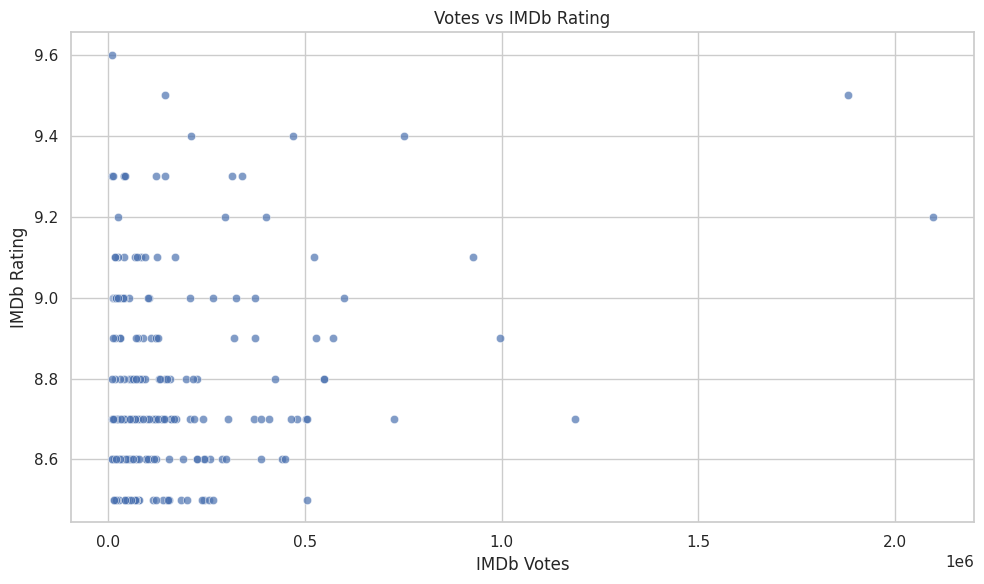

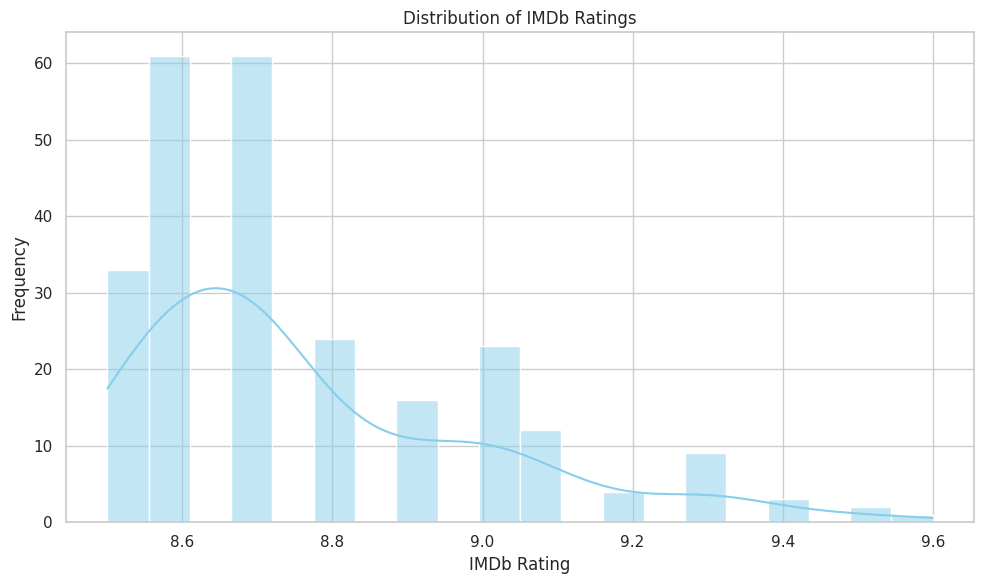

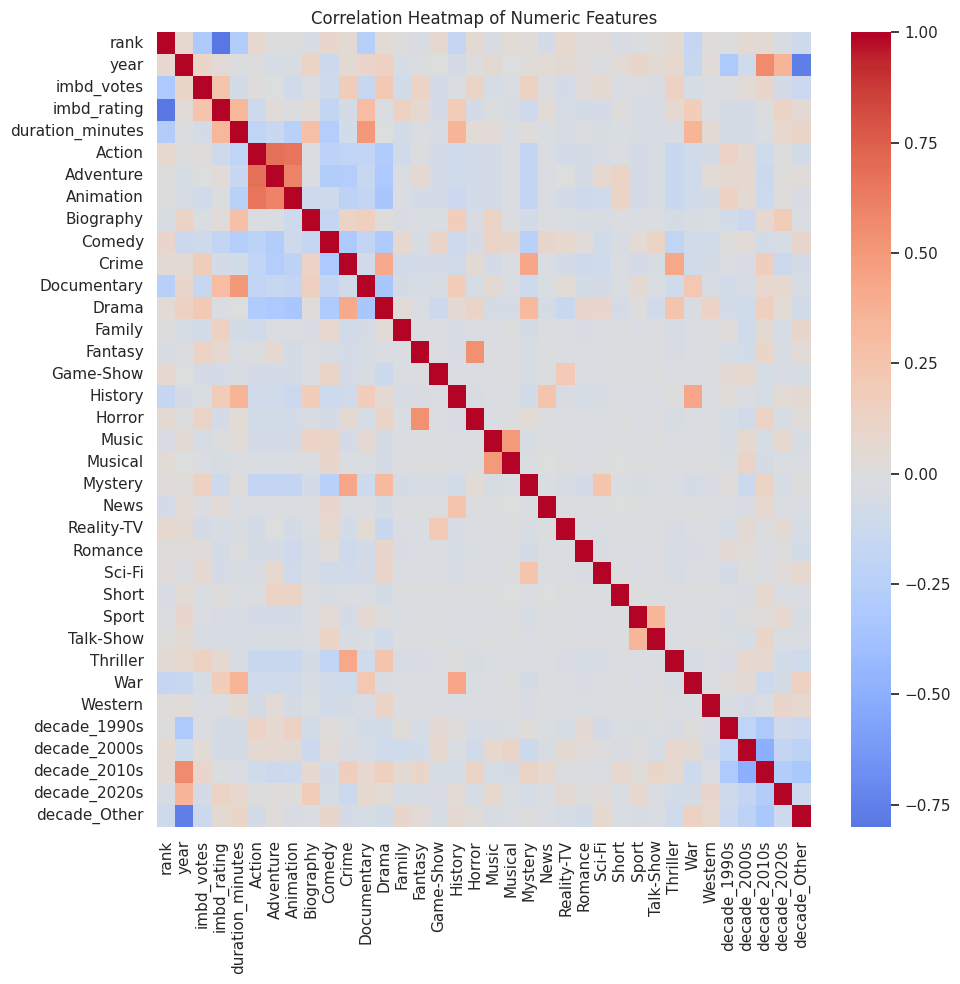

/tmp/ipython-input-87-3729263590.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_ratings.values()), y=list(avg_ratings.keys()), palette='viridis')


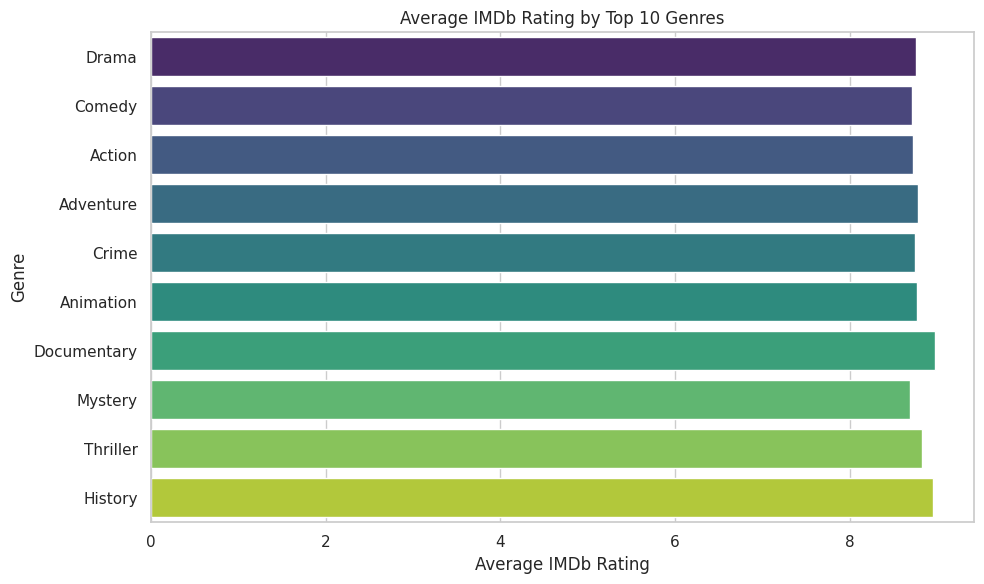

In [87]:

import matplotlib.pyplot as plt
import seaborn as sns
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Scatter plot: Votes vs IMDb Rating
plt.figure()
sns.scatterplot(data=df_cleaned, x='imbd_votes', y='imbd_rating', alpha=0.7)
plt.title("Votes vs IMDb Rating")
plt.xlabel("IMDb Votes")
plt.ylabel("IMDb Rating")
plt.tight_layout()
plt.show()

# 2. Distribution plot of IMDb Ratings
plt.figure()
sns.histplot(df_cleaned['imbd_rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Correlation heatmap (numeric columns only)
plt.figure(figsize=(10, 10))
corr_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# 4. Average IMDb Rating by Genre (Top 10 genres by frequency)
genre_columns = genre_dummies.columns
genre_counts = df[genre_columns].sum().sort_values(ascending=False).head(10)
avg_ratings = {genre: df_cleaned[df_cleaned[genre] == 1]['imbd_rating'].mean() for genre in genre_counts.index}

plt.figure()
sns.barplot(x=list(avg_ratings.values()), y=list(avg_ratings.keys()), palette='viridis')
plt.title("Average IMDb Rating by Top 10 Genres")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()





In [88]:
# Feature Engineering
# 1. Categorize year into time ranges
def categorize_year(year):
    if 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    elif 2020 <= year <= 2025:
        return '2020s'
    else:
        return 'Other'

df_cleaned['year_range'] = df_cleaned['year'].apply(categorize_year)

# One-hot encode the year_range
year_dummies = pd.get_dummies(df_cleaned['year_range'], prefix='decade')
df_cleaned = pd.concat([df_cleaned, year_dummies], axis=1)

# Drop uninformative features
df_cleaned = df_cleaned.drop(columns=['year_range', 'title', 'certificate', 'duration', 'genre'], errors='ignore')

# Final check on processed dataset
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,decade_1990s,decade_2000s,decade_2010s,decade_2020s,decade_Other,decade_1990s,decade_2000s,decade_2010s,decade_2020s,decade_Other
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,False,False,True,False,False,False,False,True,False,False
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,False,True,False,False,False,False,True,False,False,False
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,False,True,False,False,False,False,True,False,False,False
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,False,True,False,False,False,False,True,False,False,False
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,False,False,True,False,False,False,False,True,False,False


In [89]:
# Import train_test_split and StandardScaler from sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['imbd_rating'])
y = df_cleaned['imbd_rating']

# Train-test-split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numeric features
scaler = StandardScaler()
numeric_cols = ['imbd_votes', 'duration_minutes', 'rank']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train.head(), y_train.head()


(         rank    show_id  year                                  link  \
 132  0.089353  tt3322312  2015  https://www.imdb.com/title/tt3322312   
 156  0.424058  tt0080306  1980  https://www.imdb.com/title/tt0080306   
 213  1.218983  tt0421357  2003  https://www.imdb.com/title/tt0421357   
 119 -0.091946  tt0348914  2004  https://www.imdb.com/title/tt0348914   
 139  0.186975  tt0434706  2004  https://www.imdb.com/title/tt0434706   
 
      imbd_votes                                            cast_id  \
 132    1.107887  nm1214435,nm2832695,nm0711805,nm0000352,nm1912...   
 156   -0.556447  nm0248844,nm0001329,nm0288621,nm0387993,nm0626...   
 213   -0.336445  nm0586003,nm1309787,nm0657139,nm1069584,nm0848...   
 119   -0.193118  nm0648249,nm0574534,nm0662504,nm0000374,nm0114...   
 139   -0.492135  nm1428827,nm1240448,nm1145982,nm1022263,nm0765...   
 
                                              cast_name  \
 132  Charlie Cox,Deborah Ann Woll,Elden Henson,Vinc...   
 156  Paul Edd

In [90]:

# Step 5: Model Building
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Drop non-numeric columns (if any) from training and test sets
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict on the test set
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [91]:
# Show sample predictions
print("Linear Regression Predictions:", lr_preds[:5])
print("Random Forest Predictions:", rf_preds[:5])
print("Gradient Boosting Predictions:", gb_preds[:5])


Linear Regression Predictions: [8.67393358 9.1607526  8.78539874 8.89701939 8.77291243]
Random Forest Predictions: [8.673 9.307 8.833 8.814 8.814]
Gradient Boosting Predictions: [8.6281484  9.289566   8.77280385 8.81700711 8.75803015]


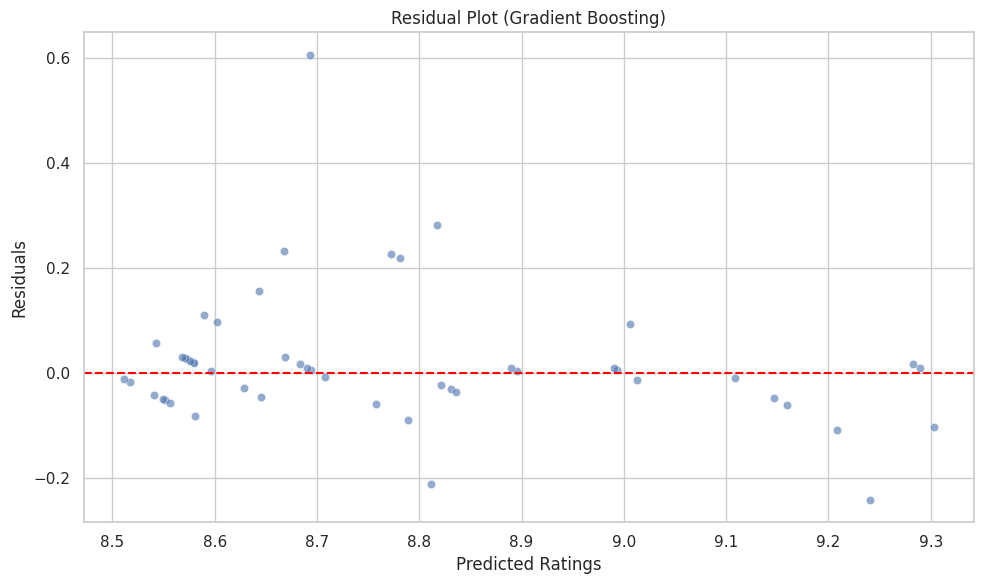

,Model,MAE,MSE,RMSE,R2
1,Random Forest,0.077380,0.016596,0.128824,0.711883
2,Gradient Boosting,0.075548,0.016606,0.128865,0.711698
0,Linear Regression,0.109086,0.022118,0.148720,0.616015


In [94]:
# import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 6: Model Evaluation

# Compute metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Evaluate all models
results = [
    evaluate_model(y_test, lr_preds, 'Linear Regression'),
    evaluate_model(y_test, rf_preds, 'Random Forest'),
    evaluate_model(y_test, gb_preds, 'Gradient Boosting')
]

results_df = pd.DataFrame(results)

# Residual plot for the best model (e.g., Gradient Boosting)

residuals = y_test - gb_preds
plt.figure()
sns.scatterplot(x=gb_preds, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Gradient Boosting)")
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

results_df.sort_values(by="R2", ascending=False)


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Smaller grid to prevent overload
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R² Score: 0.7116981912673127
